In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def plot_graph(arr, ylabel='L2 hitrate', xlabel='kernels (in-order)'):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.plot(arr)

In [141]:
def plot_bar(arr, delimeter=91, ylabel='L2 hit-rate', xlabel='kernels (in-order)'):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    plt.tight_layout()
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.axvline(x=delimeter, color='r', linestyle='--')
    ax.bar(list(range(len(arr))), height=arr, width=1)

In [88]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [104]:
onegpu = pd.read_csv('./src/'+model+'/ncu_onegpu_entire.csv')

In [105]:
onegpu = onegpu.drop(columns=onegpu.columns[1:6])

In [79]:
HITRATE = 'lts__t_sector_op_read_hit_rate.pct'
UTILIZATION = 'lts__t_sectors.avg.pct_of_peak_sustained_elapsed'
TRANSACTIONS = 'lts__t_sectors_srcunit_tex_op_read.sum'

In [129]:
# onegpu.loc[onegpu['Kernel Name'].str.contains('volta_sgemm_128x32_sliced1x4_tn',case=False)]
# onegpu.loc[onegpu['ID']==123]

In [130]:
def get_data(df):
    length = df['ID'].max()+1
    hitrates = []
    trans = []
    utils = []
    ids = list(range(length))
    for i in ids:
        h = df.loc[(df['ID']==i) & (df['Metric Name']==HITRATE)]['Metric Value'].to_numpy()[0]
        t = df.loc[(df['ID']==i) & (df['Metric Name']==TRANSACTIONS)]['Metric Value'].to_numpy()[0]
        u = df.loc[(df['ID']==i) & (df['Metric Name']==UTILIZATION)]['Metric Value'].to_numpy()[0]

        hitrates.append(h)
        trans.append(t)
        utils.append(u)
    
    hitrates = np.array(hitrates)
    trans = np.array(trans)
    utils = np.array(utils)
    ids = np.array(ids)
    return ids, hitrates, trans, utils

In [135]:
ids, hitrates, trans, utils = get_data(onegpu)

In [136]:
trans = np.delete(trans, list(range(91,123)))

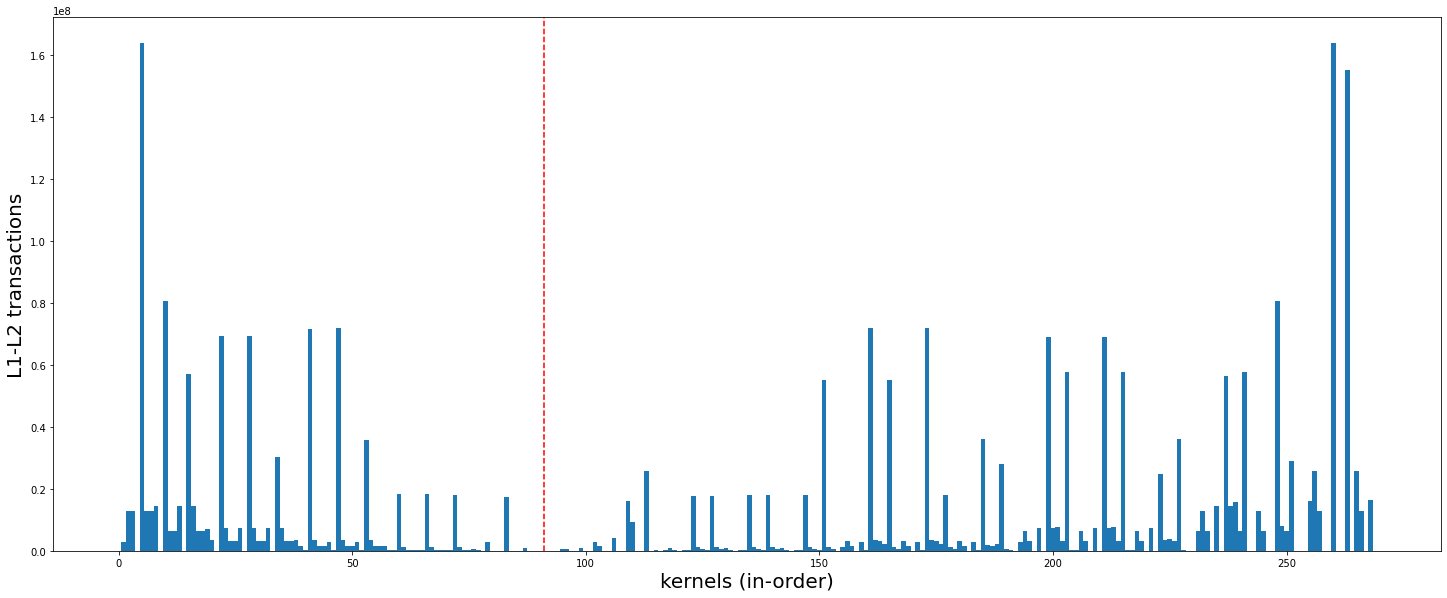

In [142]:
plot_bar(trans, ylabel='L1-L2 transactions')

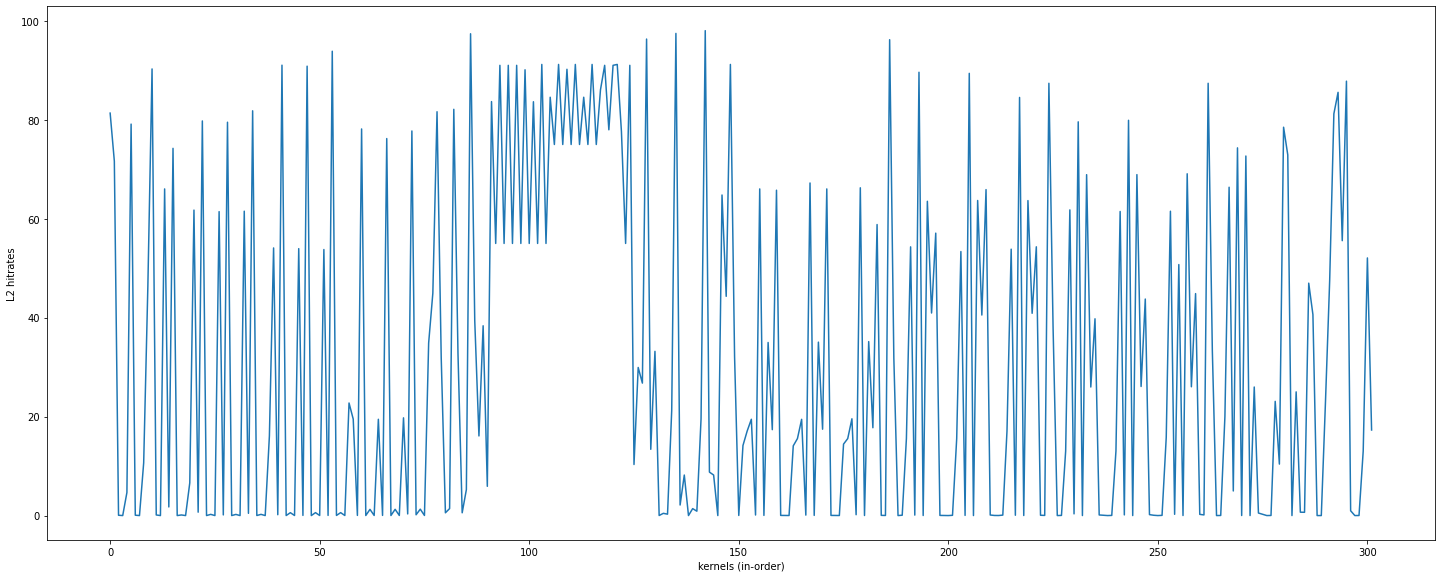

In [73]:
plot_graph(hitrates, ylabel='L2 hitrates')